<a href="https://colab.research.google.com/github/evhenhoretski/Diamond/blob/master/%D0%92%D1%96%D1%82%D0%B0%D1%94%D0%BC%D0%BE_%D0%B2_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10

# fix random seed for reproducibility
seed = 21
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

epochs = 25
optimizer = 'Adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [8]:
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np

In [9]:
classes = ['футболка', 'штани', 'кофта', 'плаття', 'пальто', 'туфлі', 'сорочка', 'кросовки', 'сумка', 'взуття']

Завантажуємо файл с навченою моделю

In [10]:
!wget https://github.com/sozykin/dlpython_course/raw/master/introduction/fashion_mnist_dense.h5 -O fashion_mnist_dense.h5

--2021-04-04 16:32:06--  https://github.com/sozykin/dlpython_course/raw/master/introduction/fashion_mnist_dense.h5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sozykin/dlpython_course/master/introduction/fashion_mnist_dense.h5 [following]
--2021-04-04 16:32:06--  https://raw.githubusercontent.com/sozykin/dlpython_course/master/introduction/fashion_mnist_dense.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7657992 (7.3M) [application/octet-stream]
Saving to: ‘fashion_mnist_dense.h5’

fashion_mnist_dense 100%[===================>]   7.30M  15.7MB/s    in 0.5s    

2021-04-04 16:32:07 (15.7 

Завантажуємо модель в память

In [11]:
model = load_model('fashion_mnist_dense.h5')

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


In [33]:
f = files.upload()

Saving 3.jpg to 3.jpg


In [37]:
!ls

 2.jpg	 fashion_mnist_dense.h5  'shirt (1).jfif'
 3.jpg	 sample_data		  shirt.jfif


In [38]:
img_path = '3.jpg'

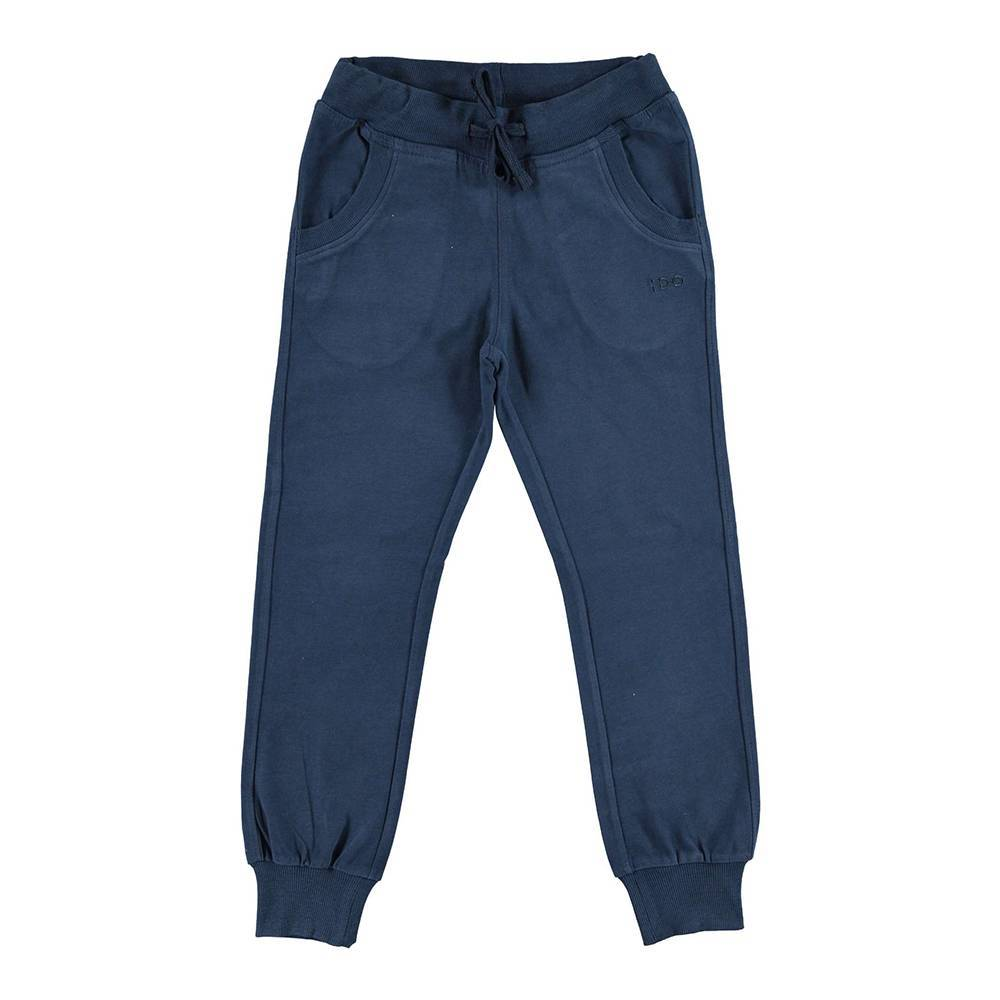

In [39]:
Image(img_path, width=150, height=150)

Завантажуємо зображення з файла з допомогою інструментів Keras

In [40]:
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Обробка зображення

In [41]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаємо разпізнавання

In [42]:
prediction = model.predict(x)

Результати разпізнавання

In [43]:
prediction

array([[4.54678968e-11, 9.98469293e-01, 1.04465965e-08, 1.52535259e-03,
        6.15177157e-07, 1.17350492e-13, 1.21026392e-06, 4.37616082e-14,
        3.53329347e-06, 1.46945839e-21]], dtype=float32)

In [44]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 1
Название класса: брюки
